## GV993 - Dissertation in MSc Social Data Science         
### Random Forest & SVM for y2= ratio duration / rest time     

## Table of contents:
* [1. Import Packages](#first-bullet)
* [2. Import files](#second-bullet)
* [3. Random Forest](#third-bullet)
    * [3. RF 6-fold Cross Validation](#third-bullet_1)
* [4. SVR](#fourth-bullet)
    * [4.a. SVR Linear](#fourth_1)
    * [4.b. SVR rbf kernel](#fourth_2)

## 1. Import Packages <a class="anchor" id="first-bullet"></a>

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


## 2. Import Files <a class="anchor" id="second-bullet"></a>

In [31]:
# Import csv file
data_lm2 = pd.read_csv("C:/Users/User/Documents/GitHub/ideology_internet_consumption/03_y2_ratio_duration_restime/data_lm_ratio.csv")

In [32]:
# Select 'X' variables
X = pd.get_dummies(data_lm2[['age_group', 'dummy_ideology', 'education', 'gender', 'dummy_working', 'region']])

In [33]:
X

,age_group,dummy_ideology,education_Elementary school (complete & incomplete),education_High school (complete & incomplete),education_Postgrad school (complete & incomplete),education_University (complete & incomplete),gender_Female,gender_Male,gender_Other,dummy_working_Not working,dummy_working_Working,region_30,region_Buenos Aires,region_CABA,region_Centro,region_Cuyo,region_NEA,region_NOA,region_Patagonia
0,32,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
1,59,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
2,32,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,50,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0
4,32,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,20,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0
914,20,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
915,32,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
916,32,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [34]:
# Select 'y' variable
y = data_lm2['median_logplus1_ratio']

## 3. Random Forest  <a class="anchor" id="third-bullet"></a>

In [35]:
# Split the data into training and test sets
# 25% of the data will be used for testing and 75% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

# Initial Random Forest Model
initial_rf = RandomForestRegressor(max_leaf_nodes=25, n_estimators=100, random_state=7)
initial_rf.fit(X_train, y_train)
initial_predictions = initial_rf.predict(X_test)

### 3.a. RF with 6fold cross-validation <a class="anchor" id="third_1"></a>

In [36]:
# Calculate the initial RMSE (Root Mean Square Error) for a set of initial predictions
# Baseline performance metric to compare against the results after hyperparameter tuning
initial_rmse = np.sqrt(mean_squared_error(y_test, initial_predictions))
print(f"Initial RMSE: {initial_rmse}")

# Set up a grid of hyperparameters to test during tuning
param_grid = {
    'max_leaf_nodes': [70, 80, 90, 100],
    'n_estimators': [900, 1000, 1100]
}

# Create a Random Forest Regressor model
grid_rf = RandomForestRegressor(random_state=7)

# Initialize GridSearchCV for hyperparameter tuning
# We use 6-fold cross-validation (cv=6), and the number of jobs (-1)
# We aim to minimize the negative root mean squared error as our scoring metric
grid_search = GridSearchCV(estimator=grid_rf, param_grid=param_grid, 
                           cv=6, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')

# Fit the model to the training data and perform hyperparameter tuning
grid_search.fit(X_train, y_train)

Initial RMSE: 0.5939925456314233
Fitting 6 folds for each of 12 candidates, totalling 72 fits


GridSearchCV(cv=6, estimator=RandomForestRegressor(random_state=7), n_jobs=-1,
             param_grid={'max_leaf_nodes': [70, 80, 90, 100],
                         'n_estimators': [900, 1000, 1100]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [37]:
best_grid = grid_search.best_estimator_

# Predict and evaluate
grid_predictions = best_grid.predict(X_test)
grid_rmse = np.sqrt(mean_squared_error(y_test, grid_predictions))
print(f"Grid RMSE: {grid_rmse}")

Grid RMSE: 0.6217245667914231


In [38]:
# Fit the Random Forest model
rf_model = RandomForestRegressor(max_leaf_nodes=70, n_estimators=900, random_state=7)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)


In [39]:
# Calculate Adjusted R-squared
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the metrics
print(f'RMSE: {grid_rmse}')
print(f'R^2: {r2}')
print(f'Adjusted R^2: {adj_r2}')

RMSE: 0.6217245667914231
R^2: -0.2162837523365433
Adjusted R^2: -0.32632847278604005


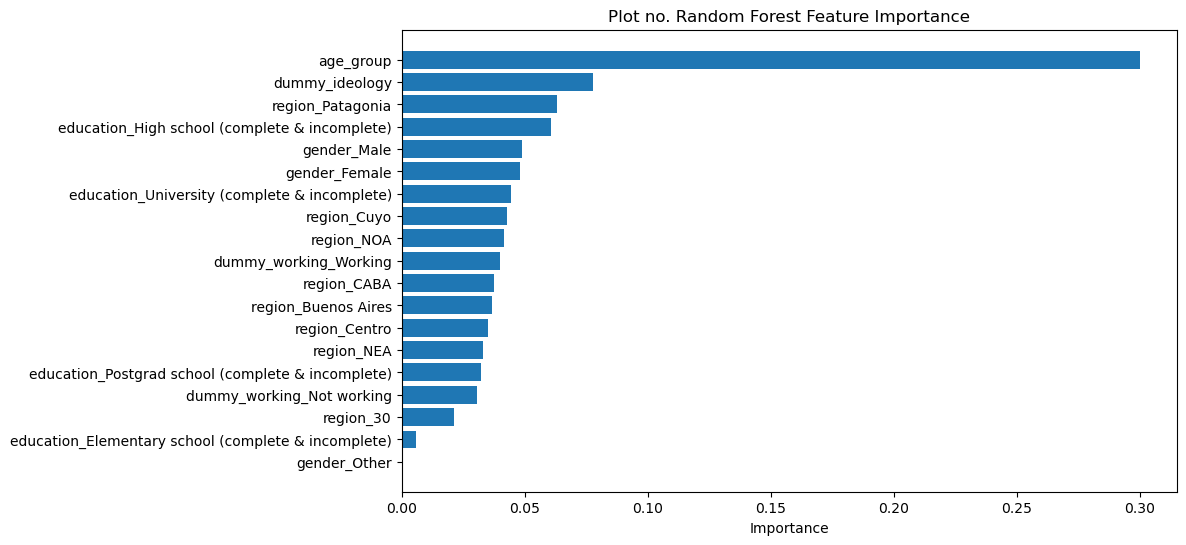

In [40]:
# Feature Importance
importances = best_grid.feature_importances_
feature_names = X.columns.tolist()

# Sort feature importances in descending order and rearrange feature names accordingly
sorted_idx = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]

# Create a bar plot:
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), importances[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), sorted_feature_names)
plt.xlabel('Importance')
plt.title('Plot no. Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [41]:
# Explort table data into dato a csv file
d = {"Features":feature_names, "Importance":importances}

importancedf=pd.DataFrame(d)

# Export file:
importancedf.to_csv("C:/Users/User/Documents/GitHub/ideology_internet_consumption/03_y2_ratio_duration_restime/importance_rf.csv", index = False)

## 4. SVR <a class="anchor" id="fourth-bullet"></a>

### 4.a. SVR Linear <a class="anchor" id="fourth_1"></a>


In [46]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Perform one-hot encoding on the categorical features
X = pd.get_dummies(data_lm2[['age_group', 'dummy_ideology', 'education', 'gender', 'dummy_working', 'region']])

# Extract the target variable ('median_logplus1_ratio') from the data
y = data_lm2['median_logplus1_ratio']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
# 25% of the data will be used for testing and 75% for training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=7)

# Create the SVM model
svr_model = SVR(kernel='linear')  # you can try different kernels like 'rbf', 'poly', etc.

# Fit the model
svr_model.fit(X_train, y_train)

# Make predictions
y_pred = svr_model.predict(X_test)

# Fit (train) the model using the training data
svr_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = svr_model.predict(X_test)

# Calculate and print the Root Mean Square Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Calculate and print the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate and print the Adjusted R-squared value
n = len(y_test)  # Number of observations in the test set
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R^2: {adj_r2}')

RMSE: 0.5797731662184732
R-squared: -0.056739815274108096
Adjusted R^2: -0.15234960808462272


### 4.b. SVR rbf kernel<a class="anchor" id="fourth_2"></a>

In [45]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a DataFrame called data_lm2
# Replace this line with your actual data loading
# data_lm2 = pd.read_csv('your_data.csv')

# One-hot encode the categorical features
X = pd.get_dummies(data_lm2[['age_group', 'dummy_ideology', 'education', 'gender', 'dummy_working', 'region']])
# Extract the target variable ('median_logplus1_ratio') from the data
y = data_lm2['median_logplus1_ratio']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
# 25% of the data will be used for testing and 75% for training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=7)

# Create the Support Vector Machine (SVM) model with a Radial Basis Function (RBF) kernel
svr_model = SVR(kernel='rbf')

# Fit (train) the model using the training data
svr_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = svr_model.predict(X_test)

# Calculate and print the Root Mean Square Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Calculate and print the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate and print the Adjusted R-squared value
n = len(y_test)  # Number of observations in the test set
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R^2: {adj_r2}')

RMSE: 0.6181703456812531
R-squared: -0.20134621457679303
Adjusted R^2: -0.31003944351469337
